<a href="https://colab.research.google.com/github/pacayton/Causal_Inference_Sessions/blob/main/Matching_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://mixtape.scunning.com/05-matching_and_subclassification

In [ ]:
## Training Data Example for Exact Matching

library(tidyverse)
library(haven)

read_data <- function(df)
{
  full_path <- paste("https://github.com/scunning1975/mixtape/raw/master/", 
                     df, sep = "")
  df <- read_dta(full_path)
  return(df)
}

training_example <- read_data("training_example.dta") %>% 
  slice(1:20)

ggplot(training_example, aes(x=age_treat)) +
  stat_bin(bins = 10, na.rm = TRUE)

ggplot(training_example, aes(x=age_control)) +
  geom_histogram(bins = 10, na.rm = TRUE)

In [3]:
### Training Data with Bias Reduction

library(tidyverse)
library(haven)

read_data <- function(df)
{
  full_path <- paste("https://github.com/scunning1975/mixtape/raw/master/", 
                     df, sep = "")
  df <- read_dta(full_path)
  return(df)
}

training_bias_reduction <- read_data("training_bias_reduction.dta") %>% 
  mutate(
    Y1 = case_when(Unit %in% c(1,2,3,4) ~ Y),
    Y0 = c(4,0,5,1,4,0,5,1))

train_reg <- lm(Y ~ X, training_bias_reduction)

training_bias_reduction <- training_bias_reduction %>% 
  mutate(u_hat0 = predict(train_reg))

training_bias_reduction

Unit,Y,D,X,Y1,Y0,u_hat0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,1,11,5,4,3.888071
2,2,1,7,2,0,4.082474
3,10,1,5,10,5,4.179676
4,6,1,3,6,1,4.276878
5,4,0,10,NA,4,3.936672
6,0,0,8,NA,0,4.033873
7,5,0,4,NA,5,4.228277
8,1,0,1,NA,1,4.374080


In [5]:
## NSW Experimental

library(tidyverse)
library(haven)

read_data <- function(df)
{
  full_path <- paste("https://github.com/scunning1975/mixtape/raw/master/", 
                     df, sep = "")
  df <- read_dta(full_path)
  return(df)
}

nsw_dw <- read_data("nsw_mixtape.dta")

nsw_dw %>% 
  filter(treat == 1) %>% 
  summary(re78)

mean1 <- nsw_dw %>% 
  filter(treat == 1) %>% 
  pull(re78) %>% 
  mean()

nsw_dw$y1 <- mean1

nsw_dw %>% 
  filter(treat == 0) %>% 
  summary(re78)

mean0 <- nsw_dw %>% 
  filter(treat == 0) %>% 
  pull(re78) %>% 
  mean()

nsw_dw$y0 <- mean0

ate <- unique(nsw_dw$y1 - nsw_dw$y0)

nsw_dw <- nsw_dw %>% 
  filter(treat == 1) %>% 
  select(-y1, -y0)

   data_id              treat        age             educ      
 Length:185         Min.   :1   Min.   :17.00   Min.   : 4.00  
 Class :character   1st Qu.:1   1st Qu.:20.00   1st Qu.: 9.00  
 Mode  :character   Median :1   Median :25.00   Median :11.00  
                    Mean   :1   Mean   :25.82   Mean   :10.35  
                    3rd Qu.:1   3rd Qu.:29.00   3rd Qu.:12.00  
                    Max.   :1   Max.   :48.00   Max.   :16.00  
     black             hisp              marr           nodegree     
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :0.00000   Median :0.0000   Median :1.0000  
 Mean   :0.8432   Mean   :0.05946   Mean   :0.1892   Mean   :0.7081  
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
      re74            re75            re78        
 Min.   :  

   data_id              treat        age             educ      
 Length:260         Min.   :0   Min.   :17.00   Min.   : 3.00  
 Class :character   1st Qu.:0   1st Qu.:19.00   1st Qu.: 9.00  
 Mode  :character   Median :0   Median :24.00   Median :10.00  
                    Mean   :0   Mean   :25.05   Mean   :10.09  
                    3rd Qu.:0   3rd Qu.:28.00   3rd Qu.:11.00  
                    Max.   :0   Max.   :55.00   Max.   :14.00  
     black             hisp             marr           nodegree     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :1.0000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.8269   Mean   :0.1077   Mean   :0.1538   Mean   :0.8346  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      re74              re75              re78             y1      
 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


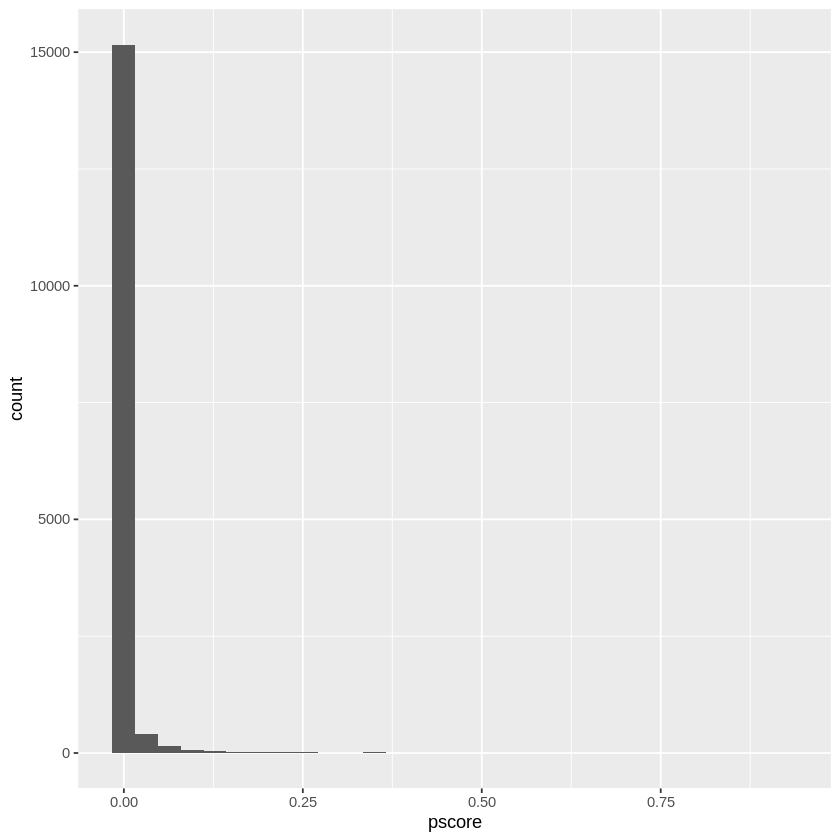

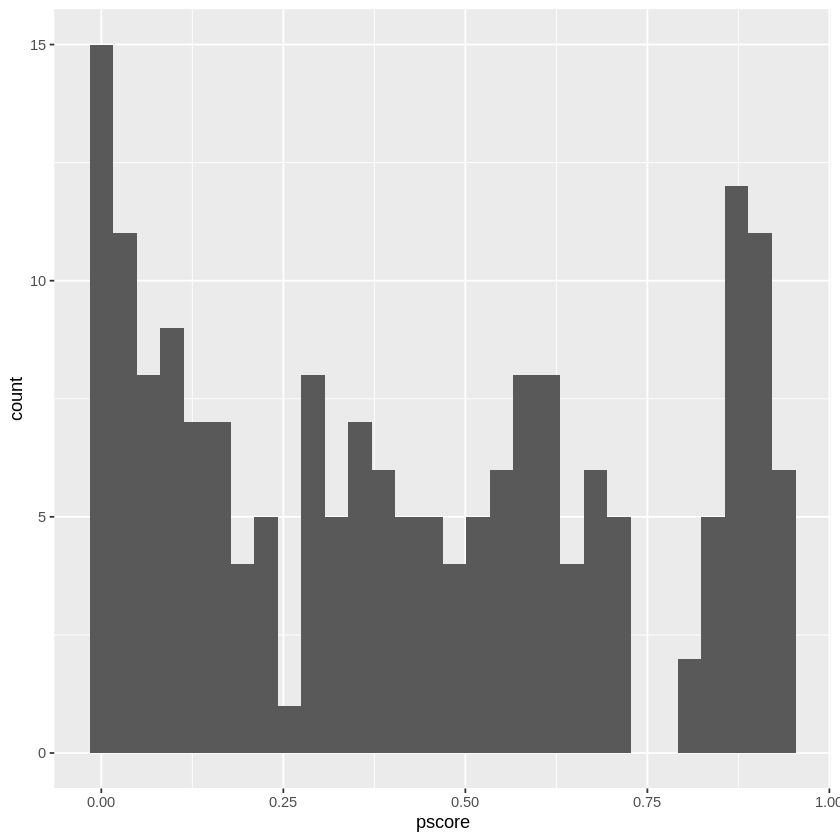

In [7]:
## NSW Propensity Score Weighting

library(tidyverse)
library(haven)

read_data <- function(df)
{
  full_path <- paste("https://github.com/scunning1975/mixtape/raw/master/", 
                     df, sep = "")
  df <- read_dta(full_path)
  return(df)
}

nsw_dw_cpscontrol <- read_data("cps_mixtape.dta") %>% 
  bind_rows(nsw_dw) %>% 
  mutate(agesq = age^2,
         agecube = age^3,
         educsq = educ*educ,
         u74 = case_when(re74 == 0 ~ 1, TRUE ~ 0),
         u75 = case_when(re75 == 0 ~ 1, TRUE ~ 0),
         interaction1 = educ*re74,
         re74sq = re74^2,
         re75sq = re75^2,
         interaction2 = u74*hisp)

# estimating
logit_nsw <- glm(treat ~ age + agesq + agecube + educ + educsq + 
                   marr + nodegree + black + hisp + re74 + re75 + u74 +
                   u75 + interaction1, family = binomial(link = "logit"), 
                 data = nsw_dw_cpscontrol)

nsw_dw_cpscontrol <- nsw_dw_cpscontrol %>% 
  mutate(pscore = logit_nsw$fitted.values)

# mean pscore 
pscore_control <- nsw_dw_cpscontrol %>% 
  filter(treat == 0) %>% 
  pull(pscore) %>% 
  mean()

pscore_treated <- nsw_dw_cpscontrol %>% 
  filter(treat == 1) %>% 
  pull(pscore) %>% 
  mean()

# histogram
nsw_dw_cpscontrol %>% 
  filter(treat == 0) %>% 
  ggplot() +
  geom_histogram(aes(x = pscore))

nsw_dw_cpscontrol %>% 
  filter(treat == 1) %>% 
  ggplot() +
  geom_histogram(aes(x = pscore))

In [8]:
## Inverse Propensity Weighting

library(tidyverse)
library(haven)

#continuation
N <- nrow(nsw_dw_cpscontrol)
#- Manual with non-normalized weights using all data
nsw_dw_cpscontrol <- nsw_dw_cpscontrol %>% 
  mutate(d1 = treat/pscore,
         d0 = (1-treat)/(1-pscore))

s1 <- sum(nsw_dw_cpscontrol$d1)
s0 <- sum(nsw_dw_cpscontrol$d0)


nsw_dw_cpscontrol <- nsw_dw_cpscontrol %>% 
  mutate(y1 = treat * re78/pscore,
         y0 = (1-treat) * re78/(1-pscore),
         ht = y1 - y0)

#- Manual with normalized weights
nsw_dw_cpscontrol <- nsw_dw_cpscontrol %>% 
  mutate(y1 = (treat*re78/pscore)/(s1/N),
         y0 = ((1-treat)*re78/(1-pscore))/(s0/N),
         norm = y1 - y0)

nsw_dw_cpscontrol %>% 
  pull(ht) %>% 
  mean()

nsw_dw_cpscontrol %>% 
  pull(norm) %>% 
  mean()

#-- trimming propensity score
nsw_dw_cpscontrol <- nsw_dw_cpscontrol %>% 
  select(-d1, -d0, -y1, -y0, -ht, -norm) %>% 
  filter(!(pscore >= 0.9)) %>% 
  filter(!(pscore <= 0.1))

N <- nrow(nsw_dw_cpscontrol)

#- Manual with non-normalized weights using trimmed data
nsw_dw_cpscontrol <- nsw_dw_cpscontrol %>% 
  mutate(d1 = treat/pscore,
         d0 = (1-treat)/(1-pscore))

s1 <- sum(nsw_dw_cpscontrol$d1)
s0 <- sum(nsw_dw_cpscontrol$d0)

nsw_dw_cpscontrol <- nsw_dw_cpscontrol %>% 
  mutate(y1 = treat * re78/pscore,
         y0 = (1-treat) * re78/(1-pscore),
         ht = y1 - y0)

#- Manual with normalized weights with trimmed data
nsw_dw_cpscontrol <- nsw_dw_cpscontrol %>% 
  mutate(y1 = (treat*re78/pscore)/(s1/N),
         y0 = ((1-treat)*re78/(1-pscore))/(s0/N),
         norm = y1 - y0)

nsw_dw_cpscontrol %>% 
  pull(ht) %>% 
  mean()

nsw_dw_cpscontrol %>% 
  pull(norm) %>% 
  mean()

[1] -11876.79

[1] -7238.14

[1] 2006.365

[1] 1806.73

In [16]:
## Nearest Neighbor Matching
install.packages(c("MatchIt"))
devtools::install_github('IQSS/Zelig')

library(MatchIt)
library(Zelig)

m_out <- matchit(treat ~ age + agesq + agecube + educ +
                 educsq + marr + nodegree +
                 black + hisp + re74 + re75 + u74 + u75 + interaction1,
                 data = nsw_dw_cpscontrol, method = "nearest", 
                 distance = "logit", ratio =5)

m_data <- match.data(m_out)

z_out <- zelig(re78 ~ treat + age + agesq + agecube + educ +
               educsq + marr + nodegree +
               black + hisp + re74 + re75 + u74 + u75 + interaction1, 
               model = "ls", data = m_data)

x_out <- setx(z_out, treat = 0)
x1_out <- setx(z_out, treat = 1)

s_out <- sim(z_out, x = x_out, x1 = x1_out)

summary(s_out)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




MatrixModels (NA     -> 0.5-1     ) [CRAN]
SparseM      (NA     -> 1.81      ) [CRAN]
zoo          (NA     -> 1.8-12    ) [CRAN]
digest       (0.6.30 -> 0.6.31    ) [CRAN]
rlang        (1.1.0  -> 1.1.1     ) [CRAN]
vctrs        (0.6.1  -> 0.6.2     ) [CRAN]
stringr      (1.4.1  -> 1.5.0     ) [CRAN]
dplyr        (1.1.1  -> 1.1.2     ) [CRAN]
fs           (1.6.1  -> 1.6.2     ) [CRAN]
waldo        (0.4.0  -> 0.5.0     ) [CRAN]
ps           (1.7.4  -> 1.7.5     ) [CRAN]
processx     (3.8.0  -> 3.8.1     ) [CRAN]
pkgload      (1.3.1  -> 1.3.2     ) [CRAN]
jsonlite     (1.8.3  -> 1.8.4     ) [CRAN]
viridisLite  (0.4.1  -> 0.4.2     ) [CRAN]
numDeriv     (NA     -> 2016.8-1.1) [CRAN]
RcppEigen    (NA     -> 0.3.3.9.3 ) [CRAN]
nloptr       (NA     -> 2.0.3     ) [CRAN]
minqa        (NA     -> 1.2.5     ) [CRAN]
lme4         (NA     -> 1.1-33    ) [CRAN]
quantreg     (NA     -> 5.95      ) [CRAN]
pbkrtest     (NA     -> 0.5.2     ) [CRAN]
abind        (NA     -> 1.4-5     ) [CRAN]
carData    

Installing 40 packages: MatrixModels, SparseM, zoo, digest, rlang, vctrs, stringr, dplyr, fs, waldo, ps, processx, pkgload, jsonlite, viridisLite, numDeriv, RcppEigen, nloptr, minqa, lme4, quantreg, pbkrtest, abind, carData, mitools, mcmc, coda, sandwich, miscTools, RcppArmadillo, Formula, lmtest, car, VGAM, survey, MCMCpack, maxLik, geepack, Amelia, AER

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpToVgo2/remotesd143da3ad4/IQSS-Zelig-4774793/DESCRIPTION’ ... OK
* preparing ‘Zelig’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘Zelig_5.1.7.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: survival


Attaching package: ‘Zelig’


The following object is masked from ‘package:purrr’:

    reduce


The following object is masked from ‘package:ggplot2’:

    stat


Warning message:
“Not all treated units will get 5 matches.”
Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.
ℹ The deprecated feature was likely used in the Zelig package.
  Please report the issue at <https://github.com/IQSS/Zelig/issues>.”
Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help
ℹ The deprecated feature was likely used in the Zelig package.
  Please report the issue at <https://github.com/IQSS/Zelig/issues>.”


How to cite this model in Zelig:
  R Core Team. 2007.
  ls: Least Squares Regression for Continuous Dependent Variables
  in Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau,
  "Zelig: Everyone's Statistical Software," https://zeligproject.org/

 sim x :
 -----
ev
      mean      sd      50%     2.5%   97.5%
1 4583.486 445.516 4584.894 3752.092 5452.42
pv
         mean       sd      50%      2.5%   97.5%
[1,] 5068.585 6604.886 4838.255 -7165.615 18360.2

 sim x1 :
 -----
ev
      mean       sd      50%     2.5%    97.5%
1 6304.197 614.6484 6327.197 5064.359 7512.231
pv
         mean       sd      50%      2.5%    97.5%
[1,] 6363.469 6730.601 6615.663 -7276.236 19046.59
fd
     mean       sd      50%     2.5%    97.5%
1 1720.71 797.4361 1741.006 119.5451 3226.596


In [17]:
## Coarsened Exact Matching
install.packages(c("cem","estimatr"))
library(cem)
library(MatchIt)
library(Zelig)
library(tidyverse)
library(estimatr)


m_out <- matchit(treat ~ age + agesq + agecube + educ +
                   educsq + marr + nodegree +
                   black + hisp + re74 + re75 + 
                   u74 + u75 + interaction1,
                 data = nsw_dw_cpscontrol, 
                 method = "cem", 
                 distance = "logit")

m_data <- match.data(m_out)

m_ate <- lm_robust(re78 ~ treat, 
               data = m_data,
               weights = m_data$weights)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘combinat’, ‘randomForest’


Loading required package: tcltk

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: lattice


How to use CEM? Type vignette("cem")


Warning message:
“The argument 'distance' is not used with `method = "cem"` and will be ignored.”


Source: https://bookdown.org/paul/applied-causal-analysis/lab-1.html

Data Source: https://drive.google.com/drive/folders/1o4OD9QTNfmMJCfGpAWHOhPx824ucqmFb

In [18]:
library(tidyverse)
install.packages(c("Matching","cem","MatchIt","cobalt","quickmatch","rgenoud"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘distances’, ‘scclust’




In [23]:

# Directly import data from shared google folder into R
  data <- readr::read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", "1WifSODzbCzf0LlP09u9rG914LcUlL08_"))
  # Or download and import: data <- readr::read_csv("data-matching.csv")

fit1 <- lm(y_trust2006 ~ d_threat2006, data = data)
fit2 <- lm(y_trust2006 ~ d_threat2006 + x_age2006 + x_male2006 + x_education2006, data = data)
fit3 <- lm(y_trust2006 ~ d_threat2006 + x_age2006 + x_male2006 + x_education2006 + x_income2006, data = data)
summary(fit1)
summary(fit2)
summary(fit3)

Rows: 23243 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): y_trust2005, y_trust2006, y_trust2007, y_trust2008, x_age2005, x_a...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Call:
lm(formula = y_trust2006 ~ d_threat2006, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2042 -1.2042  0.7958  1.7958  4.5217 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.20416    0.02968 209.021  < 2e-16 ***
d_threat2006 -0.72590    0.09360  -7.755 1.02e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.293 on 6631 degrees of freedom
  (16610 observations deleted due to missingness)
Multiple R-squared:  0.008988,	Adjusted R-squared:  0.008839 
F-statistic: 60.14 on 1 and 6631 DF,  p-value: 1.015e-14



Call:
lm(formula = y_trust2006 ~ d_threat2006 + x_age2006 + x_male2006 + 
    x_education2006, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8547 -1.1423  0.2436  1.5478  5.1913 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.734271   0.089054  64.391  < 2e-16 ***
d_threat2006    -0.669070   0.093795  -7.133 1.08e-12 ***
x_age2006       -0.002997   0.001590  -1.885  0.05948 .  
x_male2006      -0.168975   0.056795  -2.975  0.00294 ** 
x_education2006  0.134221   0.009504  14.122  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.259 on 6628 degrees of freedom
  (16610 observations deleted due to missingness)
Multiple R-squared:  0.03803,	Adjusted R-squared:  0.03745 
F-statistic:  65.5 on 4 and 6628 DF,  p-value: < 2.2e-16



Call:
lm(formula = y_trust2006 ~ d_threat2006 + x_age2006 + x_male2006 + 
    x_education2006 + x_income2006, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4539 -1.2053  0.2528  1.4463  5.2247 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.308402   0.114759  46.257  < 2e-16 ***
d_threat2006    -0.633480   0.102551  -6.177 7.12e-10 ***
x_age2006        0.011507   0.002479   4.642 3.56e-06 ***
x_male2006      -0.261041   0.070757  -3.689 0.000228 ***
x_education2006  0.133029   0.012461  10.676  < 2e-16 ***
x_income2006    -0.036245   0.035205  -1.030 0.303282    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.122 on 4388 degrees of freedom
  (18849 observations deleted due to missingness)
Multiple R-squared:  0.05462,	Adjusted R-squared:  0.05354 
F-statistic: 50.71 on 5 and 4388 DF,  p-value: < 2.2e-16


In [25]:
# Load the data
data <- readr::read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", "1WifSODzbCzf0LlP09u9rG914LcUlL08_"))

# Create a new dataset
data2 <- data %>% dplyr::select(y_trust2006, d_threat2006, x_age2006,
                          x_education2006, x_male2006, x_income2006) %>% 
                              na.omit() # delete missings

Rows: 23243 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): y_trust2005, y_trust2006, y_trust2007, y_trust2008, x_age2005, x_a...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
# Estimate the propensity score
# Prob. that someone is victimized as a function of covariates
glm1  <- glm(d_threat2006 ~ x_age2006 + I(x_age2006^2) + x_education2006 + 
               I(x_education2006^2) + x_male2006 + x_income2006, 
             family=binomial, data=data2)
summary(glm1)


Call:
glm(formula = d_threat2006 ~ x_age2006 + I(x_age2006^2) + x_education2006 + 
    I(x_education2006^2) + x_male2006 + x_income2006, family = binomial, 
    data = data2)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.3463729  0.3709073  -0.934  0.35038    
x_age2006            -0.0676577  0.0229783  -2.944  0.00324 ** 
I(x_age2006^2)        0.0004567  0.0002749   1.661  0.09663 .  
x_education2006      -0.0189138  0.0655368  -0.289  0.77289    
I(x_education2006^2)  0.0003818  0.0055737   0.068  0.94539    
x_male2006            0.4520637  0.1082699   4.175 2.98e-05 ***
x_income2006         -0.0097880  0.0595634  -0.164  0.86947    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3101.9  on 4393  degrees of freedom
Residual deviance: 2979.3  on 4387  degrees of freedom
AIC: 2993.3

Number of Fisher Scoring iterations: 5


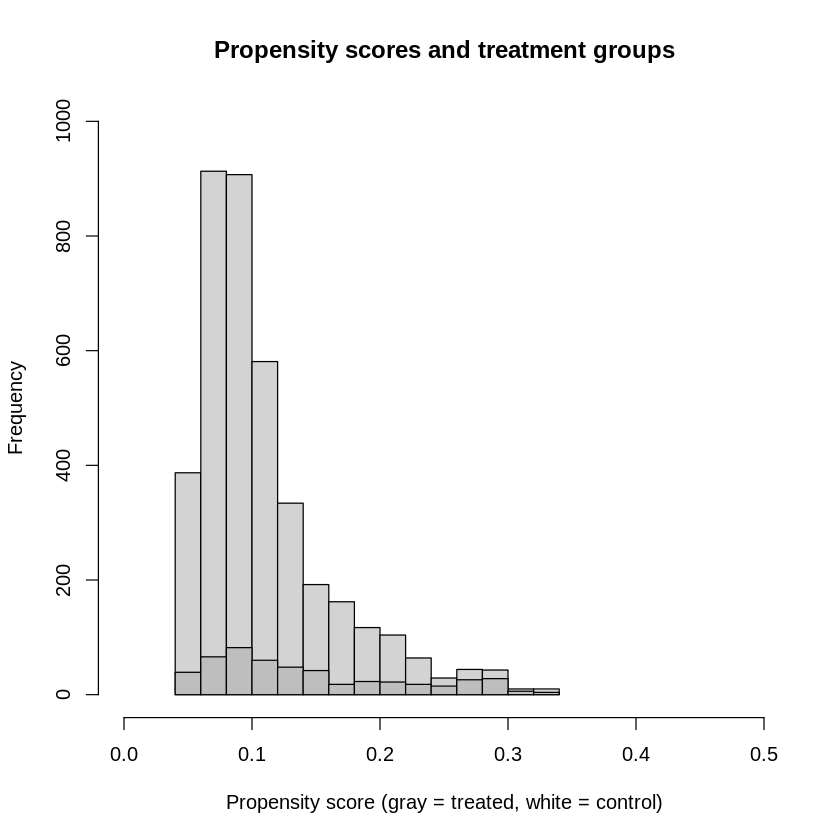

In [27]:
# Calculate (predict) propensity score for each unit and create dataframe
data_treatment_propscore <- data.frame(pr_score = predict(glm1, type = "response"),
                     treatment = glm1$model$d_threat2006)

# Ideally, visualize prop scores by treatment status (histograms)
# Continue using the prop score for matching...
hist(data_treatment_propscore$pr_score[data_treatment_propscore$treatment==0], xlim=c(0,0.5), ylim=c(0,1000), 
     main = "Propensity scores and treatment groups", xlab = "Propensity score (gray = treated, white = control)")
hist(data_treatment_propscore$pr_score[data_treatment_propscore$treatment==1], add = TRUE, col = "gray")

In [29]:
# save data objects
X  <- glm1$fitted
Y  <- data2$y_trust2006
Tr  <- data2$d_threat2006

# Estimating the treatment effect on the treated (the "estimand" option defaults to ATT).
rr  <- Matching::Match(Y=Y, Tr=Tr, X=X, M=1)
summary(rr)


Estimate...  -0.65135 
AI SE......  0.12558 
T-stat.....  -5.1867 
p.val......  2.14e-07 

Original number of observations..............  4394 
Original number of treated obs...............  497 
Matched number of observations...............  497 
Matched number of observations  (unweighted).  5901 



In [31]:
mb  <- Matching::MatchBalance(d_threat2006 ~ x_age2006 + I(x_age2006^2) + x_education2006 + 
               I(x_education2006^2) + x_male2006 + x_income2006, 
               data=data2, match.out=rr, nboots=10) # use higher nboots in applications


***** (V1) x_age2006 *****
                       Before Matching 	 	 After Matching
mean treatment........     35.714 	 	     35.714 
mean control..........     42.054 	 	      35.99 
std mean diff.........    -44.504 	 	    -1.9355 

mean raw eQQ diff.....     6.3581 	 	    0.64769 
med  raw eQQ diff.....          6 	 	          0 
max  raw eQQ diff.....         12 	 	          6 

mean eCDF diff........   0.090769 	 	   0.009475 
med  eCDF diff........   0.090635 	 	  0.0033893 
max  eCDF diff........    0.20444 	 	   0.042196 

var ratio (Tr/Co).....      1.113 	 	     0.9632 
T-test p-value........ < 2.22e-16 	 	    0.39586 
KS Bootstrap p-value.. < 2.22e-16 	 	 < 2.22e-16 
KS Naive p-value...... 2.2204e-16 	 	 5.4696e-05 
KS Statistic..........    0.20444 	 	   0.042196 


***** (V2) I(x_age2006^2) *****
                       Before Matching 	 	 After Matching
mean treatment........       1478 	 	       1478 
mean control..........     1950.8 	 	     1505.5 
std mean diff......

In [39]:
balance.table <- cobalt::bal.tab(rr, d_threat2006 ~ x_age2006 + I(x_age2006^2) + x_education2006 + 
               I(x_education2006^2) + x_male2006 + x_income2006, data = data2, un = TRUE, quick = FALSE)
balance.table

Balance Measures
                        Type Diff.Un Diff.Adj
x_age2006            Contin. -0.4450  -0.0194
I(x_age2006^2)       Contin. -0.4292  -0.0250
x_education2006      Contin. -0.1893   0.0289
I(x_education2006^2) Contin. -0.1443   0.0271
x_male2006            Binary  0.1054  -0.0103
x_income2006         Contin. -0.1449   0.0050

Sample sizes
                     Control Treated
All                  3897.       497
Matched (ESS)        1190.57     497
Matched (Unweighted) 2759.       497
Unmatched            1138.         0

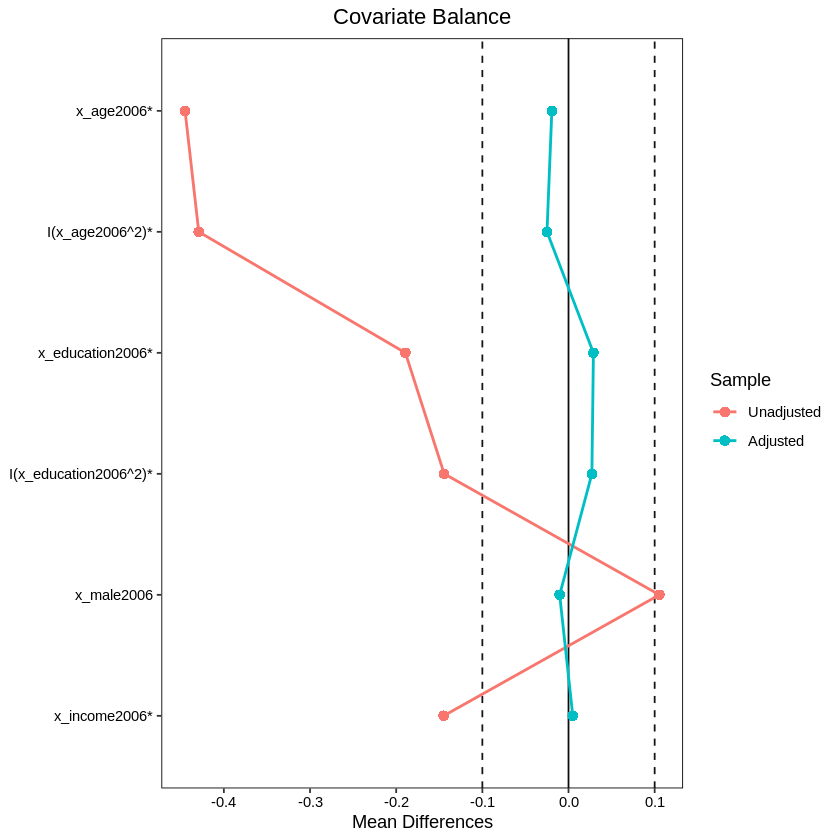

In [40]:
cobalt::love.plot(balance.table, 
          threshold =.1,
          line = TRUE,
          stars = "std")

In [42]:
## Genetic Matching

# Load the data
data <- readr::read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", "1WifSODzbCzf0LlP09u9rG914LcUlL08_"))

# Subset the data
data2 <- data %>% dplyr::select(y_trust2006, d_threat2006, 
                          x_education2006)

# then delete missings (Q: Why not the other way round?)
data2 <- na.omit(data2)

# ?GenMatch
# Define covariat matrix, outcome, treatment
  X  <- as.matrix(data2 %>% dplyr::select(x_education2006))
  Y  <- data2$y_trust2006 # Define outcome/Response vector
  Tr  <- data2$d_threat2006 # Define treatment vector

# GenMatch() finds the optimal weight to give each
# covariate in 'X' so as we have achieved balance on the covariates in
# See description http://sekhon.berkeley.edu/papers/MatchingJSS.pdf
  gen1 <- Matching::GenMatch(Tr = Tr, X = X, 
                   estimand = "ATT", 
                   M = 1, 
                   replace=FALSE,
                   exact = TRUE,
                   pop.size=16,
                   max.generations=10, 
                   wait.generations=1)

Rows: 23243 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): y_trust2005, y_trust2006, y_trust2007, y_trust2008, x_age2005, x_a...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Loading required namespace: rgenoud





Wed May  3 15:27:05 2023
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	1
	(2) Uniform Mutation.................. 	2
	(3) Boundary Mutation................. 	2
	(4) Non-Uniform Mutation.............. 	2
	(5) Polytope Crossover................ 	2
	(6) Simple Crossover.................. 	2
	(7) Whole Non-Uniform Mutation........ 	2
	(8) Heuristic Crossover............... 	2
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 1
Population size       : 16
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 1.000000e+00  1.000000e+00  
#unique......... 16, #Total UniqueCount: 16
var 1:


In [ ]:
  mgens <- Match(Y=Y, Tr= Tr, X = X, 
                 estimand="ATT",
                 M = 1,
                 replace=FALSE,
                 exact = TRUE,
                 Weight.matrix = gen1)
  summary(mgens)

In [ ]:
  mb <- MatchBalance(Tr ~  x_education2006,
                     match.out = mgens, nboots = 10, data = data2)

In [ ]:
data.matched <- bind_rows(data2 %>% slice(mgens$index.treated), # subset data
                          data2 %>% slice(mgens$index.control))

data.matched <- bind_cols(data.matched, # Add vector of weights
                          weights = rep(mgens$weights, 2))

In [ ]:
summary(lm(y_trust2006 ~ d_threat2006 + x_education2006, data = data.matched))

In [ ]:
  # Create original dataset with dummy for matching   
    data3 <- data2
    data3$matched <- FALSE
    data3$matched[mgens$index.treated] <- TRUE
    data3$matched[mgens$index.control] <- TRUE

In [ ]:
### Matching on more variables and polynomials..

data <- readr::read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", "1WifSODzbCzf0LlP09u9rG914LcUlL08_"))

data2 <- data %>% dplyr::select(y_trust2006, d_threat2006, 
                          x_age2006, x_education2006, 
                          x_male2006, x_income2006)
data2 <- na.omit(data2)

X  <- data2 %>% dplyr::select(x_age2006, x_education2006, 
                          x_male2006, x_income2006) # Define covariates
Y  <- data2$y_trust2006 # Define outcome/Response vector
Tr  <- data2$d_threat2006 # Define treatment vector

# A matrix containing the variables we wish to achieve balance on. 
# Default = X
BalanceMat <- cbind(data2$x_age2006, data2$x_education2006, 
                    data2$x_male2006, data2$x_income2006, 
                    I(data2$x_age2006^2), I(data2$x_education2006^2),
                    I(data2$x_income2006^2))

# GenMatch() finds the optimal weight to give each
# covariate in 'X' so as we have achieved balance on the covariates in
# 'BalanceMat'. Quick example with 'pop.size = 16'
# Should much bigger see
# http://sekhon.berkeley.edu/papers/MatchingJSS.pdf

gen1 <- GenMatch(Tr = Tr, X = X, 
                 BalanceMatrix = BalanceMat, 
                 estimand = "ATT", 
                   M = 1, 
                   replace=FALSE,
                   exact = TRUE,
                   pop.size=16,
                   max.generations=10, 
                   wait.generations=1)

In [ ]:
mgens <- Match(Y=Y, Tr= Tr, X = X, 
                 estimand = "ATT", 
                   M = 1, 
                   replace=FALSE,
                   exact = TRUE,
               Weight.matrix = gen1)
summary(mgens)

In [ ]:
#Let's determine if balance has actually been obtained on the variables of interest
mb <- MatchBalance(Tr ~ x_age2006 + x_education2006 + 
                     x_male2006 + x_income2006 + 
                     I(x_age2006^2) + I(x_education2006^2) + 
                     I(x_income2006^2),
                   match.out = mgens, nboots = 10, data = data2) 

In [ ]:
# Visualize balance with bal.tab (cobalt package)
balance.table <- bal.tab(mgens, d_threat2006 ~ x_age2006 + x_education2006 + 
                     x_male2006 + x_income2006 + 
                     I(x_age2006^2) + I(x_education2006^2) + 
                     I(x_income2006^2), data = data2)

love.plot(balance.table, 
          threshold =.1,
          line = TRUE,
          stars = "std") # check ?love.plot; * variables have been standardized

Source: https://bookdown.org/mike/data_analysis/matching-methods.html

Using MatchIt

In [ ]:
## Using MatchIt

library(MatchIt)
data("lalonde")

In [ ]:
# No matching; constructing a pre-match matchit object
m.out0 <- matchit(
    formula(treat ~ age + educ + race + married + nodegree + re74 + re75, env = lalonde),
    data = data.frame(lalonde),
    method = NULL,
    # assess balance before matching
    distance = "glm" # logistic regression
)

# Checking balance prior to matching
summary(m.out0)

In [ ]:
# 1:1 NN PS matching w/o replacement
m.out1 <- matchit(
    treat ~ age + educ, #+ race + married + nodegree + re74 + re75,
    data = lalonde,
    method = "nearest",
    distance = "glm"
)
m.out1
#> A matchit object
#>  - method: 1:1 nearest neighbor matching without replacement
#>  - distance: Propensity score
#>              - estimated with logistic regression
#>  - number of obs.: 614 (original), 370 (matched)
#>  - target estimand: ATT
#>  - covariates: age, educ

In [ ]:
# Checking balance after NN matching
summary(m.out1, un = FALSE)
#> 
#> Call:
#> matchit(formula = treat ~ age + educ, data = lalonde, method = "nearest", 
#>     distance = "glm")
#> 
#> Summary of Balance for Matched Data:
#>          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
#> distance        0.3080        0.3077          0.0094     0.9963    0.0033
#> age            25.8162       25.8649         -0.0068     1.0300    0.0050
#> educ           10.3459       10.2865          0.0296     0.5886    0.0253
#>          eCDF Max Std. Pair Dist.
#> distance   0.0432          0.0146
#> age        0.0162          0.0597
#> educ       0.1189          0.8146
#> 
#> Sample Sizes:
#>           Control Treated
#> All           429     185
#> Matched       185     185
#> Unmatched     244       0
#> Discarded       0       0

# examine visually
plot(m.out1, type = "jitter", interactive = FALSE)

In [ ]:

plot(
    m.out1,
    type = "qq",
    interactive = FALSE,
    which.xs = c("age")#, "married", "re75")
)

In [ ]:
# Full matching on a probit PS
m.out2 <- matchit(treat ~ age + educ, # + race + married + nodegree + re74 + re75, 
                  data = lalonde,
                  method = "full", 
                  distance = "glm", 
                  link = "probit")
m.out2
#> A matchit object
#>  - method: Optimal full matching
#>  - distance: Propensity score
#>              - estimated with probit regression
#>  - number of obs.: 614 (original), 614 (matched)
#>  - target estimand: ATT
#>  - covariates: age, educ

In [ ]:
# Checking balance after full matching
summary(m.out2, un = FALSE)
#> 
#> Call:
#> matchit(formula = treat ~ age + educ, data = lalonde, method = "full", 
#>     distance = "glm", link = "probit")
#> 
#> Summary of Balance for Matched Data:
#>          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
#> distance        0.3082        0.3082          0.0015     0.9837    0.0042
#> age            25.8162       25.8670         -0.0071     0.9966    0.0064
#> educ           10.3459       10.4669         -0.0602     0.4703    0.0416
#>          eCDF Max Std. Pair Dist.
#> distance   0.0270          0.0453
#> age        0.0264          0.1369
#> educ       0.1613          1.3057
#> 
#> Sample Sizes:
#>               Control Treated
#> All            429.       185
#> Matched (ESS)  216.09     185
#> Matched        429.       185
#> Unmatched        0.         0
#> Discarded        0.         0

plot(summary(m.out2))

In [ ]:
# Full matching on a probit PS
m.out3 <-
    matchit(
        treat ~ age + educ, # + race + married + nodegree + re74 + re75,
        data = lalonde,
        method = "exact"
    )
m.out3
#> A matchit object
#>  - method: Exact matching
#>  - number of obs.: 614 (original), 332 (matched)
#>  - target estimand: ATT
#>  - covariates: age, educ

In [ ]:
m.out4 <- matchit(
    treat ~ age + educ, # + race + married + nodegree + re74 + re75,
    data = lalonde,
    method = "subclass"
)
m.out4
#> A matchit object
#>  - method: Subclassification (6 subclasses)
#>  - distance: Propensity score
#>              - estimated with logistic regression
#>  - number of obs.: 614 (original), 614 (matched)
#>  - target estimand: ATT
#>  - covariates: age, educ

# Or you can use in conjunction with "nearest"
m.out4 <- matchit(
    treat ~ age + educ, # + race + married +  nodegree + re74 + re75,
    data = lalonde,
    method = "nearest",
    option = "subclass"
)
m.out4
#> A matchit object
#>  - method: 1:1 nearest neighbor matching without replacement
#>  - distance: Propensity score
#>              - estimated with logistic regression
#>  - number of obs.: 614 (original), 370 (matched)
#>  - target estimand: ATT
#>  - covariates: age, educ

In [ ]:
m.out5 <- matchit(
    treat ~ age + educ, # + race + married + nodegree + re74 + re75,
    data = lalonde,
    method = "optimal",
    ratio = 2
)
m.out5
#> A matchit object
#>  - method: 2:1 optimal pair matching
#>  - distance: Propensity score
#>              - estimated with logistic regression
#>  - number of obs.: 614 (original), 555 (matched)
#>  - target estimand: ATT
#>  - covariates: age, educ

In [ ]:
m.out6 <- matchit(
    treat ~ age + educ, # + race + married + nodegree + re74 + re75,
    data = lalonde,
    method = "genetic"
)
m.out6
#> A matchit object
#>  - method: 1:1 genetic matching without replacement
#>  - distance: Propensity score
#>              - estimated with logistic regression
#>  - number of obs.: 614 (original), 370 (matched)
#>  - target estimand: ATT
#>  - covariates: age, educ

In [ ]:
# get matched data
m.data1 <- match.data(m.out1)

head(m.data1)
#>      treat age educ   race married nodegree re74 re75       re78  distance
#> NSW1     1  37   11  black       1        1    0    0  9930.0460 0.2536942
#> NSW2     1  22    9 hispan       0        1    0    0  3595.8940 0.3245468
#> NSW3     1  30   12  black       0        0    0    0 24909.4500 0.2881139
#> NSW4     1  27   11  black       0        1    0    0  7506.1460 0.3016672
#> NSW5     1  33    8  black       0        1    0    0   289.7899 0.2683025
#> NSW6     1  22    9  black       0        1    0    0  4056.4940 0.3245468
#>      weights subclass
#> NSW1       1        1
#> NSW2       1       98
#> NSW3       1      109
#> NSW4       1      120
#> NSW5       1      131
#> NSW6       1      142

In [ ]:
library("lmtest") #coeftest
library("sandwich") #vcovCL

# imbalance matched dataset
fit1 <- lm(re78 ~ treat + age + educ , #+ race + married + nodegree + re74 + re75, 
           data = m.data1, 
           weights = weights)

coeftest(fit1, vcov. = vcovCL, cluster = ~subclass)
#> 
#> t test of coefficients:
#> 
#>              Estimate Std. Error t value Pr(>|t|)   
#> (Intercept)  -106.555   2464.875 -0.0432 0.965542   
#> treat       -1221.832    785.492 -1.5555 0.120691   
#> age           152.118     53.241  2.8571 0.004519 **
#> educ          362.502    171.893  2.1089 0.035634 * 
#> ---
#> Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
# balance matched dataset 
m.data2 <- match.data(m.out2)

fit2 <- lm(re78 ~ treat + age + educ , #+ race + married + nodegree + re74 + re75, 
           data = m.data2, weights = weights)

coeftest(fit2, vcov. = vcovCL, cluster = ~subclass)
#> 
#> t test of coefficients:
#> 
#>             Estimate Std. Error t value Pr(>|t|)   
#> (Intercept) -588.890   2890.500 -0.2037 0.838630   
#> treat       -380.494    685.482 -0.5551 0.579047   
#> age          169.097     53.592  3.1553 0.001682 **
#> educ         285.433    206.986  1.3790 0.168400   
#> ---
#> Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Using MatchingFrontier

In [ ]:
# library(devtools)
# install_github('ChristopherLucas/MatchingFrontier')
library(MatchingFrontier)
data("lalonde")
# choose var to match on
match.on <- colnames(lalonde)[!(colnames(lalonde) %in% c('re78', 'treat'))]
match.on

# Mahanlanobis frontier (default)
mahal.frontier <-
    makeFrontier(
        dataset = lalonde,
        treatment = "treat",
        match.on = match.on
    )
mahal.frontier

# L1 frontier
L1.frontier <-
    makeFrontier(
        dataset = lalonde,
        treatment = 'treat',
        match.on = match.on,
        QOI = 'SATT',
        metric = 'L1',
        ratio = 'fixed'
    )
L1.frontier

# estimate effects along the frontier

# Set base form
my.form <-
    as.formula(re78 ~ treat + age + black + education + hispanic + married + nodegree + re74 + re75)

# Estimate effects for the mahalanobis frontier
mahal.estimates <-
    estimateEffects(
        mahal.frontier,
        're78 ~ treat',
        mod.dependence.formula = my.form,
        continuous.vars = c('age', 'education', 're74', 're75'),
        prop.estimated = .1,
        means.as.cutpoints = TRUE
    )

# Estimate effects for the L1 frontier
L1.estimates <-
    estimateEffects(
        L1.frontier,
        're78 ~ treat',
        mod.dependence.formula = my.form,
        continuous.vars = c('age', 'education', 're74', 're75'),
        prop.estimated = .1,
        means.as.cutpoints = TRUE
    )

# Plot covariates means 
# plotPrunedMeans()


# Plot estimates (deprecated)
# plotEstimates(
#     L1.estimates,
#     ylim = c(-10000, 3000),
#     cex.lab = 1.4,
#     cex.axis = 1.4,
#     panel.first = grid(NULL, NULL, lwd = 2,)
# )

# Plot estimates
plotMeans(L1.frontier)


# parallel plot
parallelPlot(
    L1.frontier,
    N = 400,
    variables = c('age', 're74', 're75', 'black'),
    treated.col = 'blue',
    control.col = 'gray'
)

# export matched dataset
matched.data <- generateDataset(L1.frontier, N = 400) # take 400 units

Using cem for Coarsened Exact Matching

In [ ]:
library(cem)
data(LeLonde)

Le <- data.frame(na.omit(LeLonde)) # remove missing data
# treated and control groups
tr <- which(Le$treated==1)
ct <- which(Le$treated==0)
ntr <- length(tr)
nct <- length(ct)

# unadjusted, biased difference in means
mean(Le$re78[tr]) - mean(Le$re78[ct])
#> [1] 759.0479

# pre-treatment covariates
vars <-
    c(
        "age",
        "education",
        "black",
        "married",
        "nodegree",
        "re74",
        "re75",
        "hispanic",
        "u74",
        "u75",
        "q1"
    )

# overall imbalance statistics
imbalance(group=Le$treated, data=Le[vars]) # L1 = 0.902
#> 
#> Multivariate Imbalance Measure: L1=0.902
#> Percentage of local common support: LCS=5.8%
#> 
#> Univariate Imbalance Measures:
#> 
#>               statistic   type           L1 min 25%      50%       75%
#> age        -0.252373042 (diff) 5.102041e-03   0   0   0.0000   -1.0000
#> education   0.153634710 (diff) 8.463851e-02   1   0   1.0000    1.0000
#> black      -0.010322734 (diff) 1.032273e-02   0   0   0.0000    0.0000
#> married    -0.009551495 (diff) 9.551495e-03   0   0   0.0000    0.0000
#> nodegree   -0.081217371 (diff) 8.121737e-02   0  -1   0.0000    0.0000
#> re74      -18.160446880 (diff) 5.551115e-17   0   0 284.0715  806.3452
#> re75      101.501761679 (diff) 5.551115e-17   0   0 485.6310 1238.4114
#> hispanic   -0.010144756 (diff) 1.014476e-02   0   0   0.0000    0.0000
#> u74        -0.045582186 (diff) 4.558219e-02   0   0   0.0000    0.0000
#> u75        -0.065555292 (diff) 6.555529e-02   0   0   0.0000    0.0000
#> q1          7.494021189 (Chi2) 1.067078e-01  NA  NA       NA        NA
#>                  max
#> age          -6.0000
#> education     1.0000
#> black         0.0000
#> married       0.0000
#> nodegree      0.0000
#> re74      -2139.0195
#> re75        490.3945
#> hispanic      0.0000
#> u74           0.0000
#> u75           0.0000
#> q1                NA

# drop other variables that are not pre-treatmentt matching variables
todrop <- c("treated", "re78")
imbalance(group=Le$treated, data=Le, drop=todrop)
#> 
#> Multivariate Imbalance Measure: L1=0.902
#> Percentage of local common support: LCS=5.8%
#> 
#> Univariate Imbalance Measures:
#> 
#>               statistic   type           L1 min 25%      50%       75%
#> age        -0.252373042 (diff) 5.102041e-03   0   0   0.0000   -1.0000
#> education   0.153634710 (diff) 8.463851e-02   1   0   1.0000    1.0000
#> black      -0.010322734 (diff) 1.032273e-02   0   0   0.0000    0.0000
#> married    -0.009551495 (diff) 9.551495e-03   0   0   0.0000    0.0000
#> nodegree   -0.081217371 (diff) 8.121737e-02   0  -1   0.0000    0.0000
#> re74      -18.160446880 (diff) 5.551115e-17   0   0 284.0715  806.3452
#> re75      101.501761679 (diff) 5.551115e-17   0   0 485.6310 1238.4114
#> hispanic   -0.010144756 (diff) 1.014476e-02   0   0   0.0000    0.0000
#> u74        -0.045582186 (diff) 4.558219e-02   0   0   0.0000    0.0000
#> u75        -0.065555292 (diff) 6.555529e-02   0   0   0.0000    0.0000
#> q1          7.494021189 (Chi2) 1.067078e-01  NA  NA       NA        NA
#>                  max
#> age          -6.0000
#> education     1.0000
#> black         0.0000
#> married       0.0000
#> nodegree      0.0000
#> re74      -2139.0195
#> re75        490.3945
#> hispanic      0.0000
#> u74           0.0000
#> u75           0.0000
#> q1                NA

In [ ]:
## Automated Coarsening

mat <- cem(treatment = "treated", data = Le, drop = "re78",keep.all=TRUE)
#> 
#> Using 'treated'='1' as baseline group
mat
#>            G0  G1
#> All       392 258
#> Matched    95  84
#> Unmatched 297 174

# mat$w

In [ ]:
## Coarsening by Explicit User Choice

# categorial variables
levels(Le$q1) # grouping option
#> [1] "agree"             "disagree"          "neutral"          
#> [4] "no opinion"        "strongly agree"    "strongly disagree"
q1.grp <- list(c("strongly agree", "agree"), c("neutral", "no opinion"), c("strongly disagree","disagree")) # if you want ordered categories

# continuous variables 
table(Le$education)
#> 
#>   3   4   5   6   7   8   9  10  11  12  13  14  15 
#>   1   5   4   6  12  55 106 146 173 113  19   9   1
educut <- c(0, 6.5, 8.5, 12.5, 17)  # use cutpoints

mat1 <- cem(treatment = "treated", data = Le, drop = "re78", cutpoints = list(education=educut), grouping=list(q1=q1.grp))
#> 
#> Using 'treated'='1' as baseline group
mat1
#>            G0  G1
#> All       392 258
#> Matched   158 115
#> Unmatched 234 143

Genetic Matching

In [ ]:
library(Matching)
data(lalonde)
attach(lalonde)

#The covariates we want to match on
X = cbind(age, educ, black, hisp, married, nodegr, u74, u75, re75, re74)

#The covariates we want to obtain balance on
BalanceMat <- cbind(age, educ, black, hisp, married, nodegr, u74, u75, re75, re74,
                    I(re74*re75))

#
#Let's call GenMatch() to find the optimal weight to give each
#covariate in 'X' so as we have achieved balance on the covariates in
#'BalanceMat'. This is only an example so we want GenMatch to be quick
#so the population size has been set to be only 16 via the 'pop.size'
#option. This is *WAY* too small for actual problems.
#For details see http://sekhon.berkeley.edu/papers/MatchingJSS.pdf.
#
genout <- GenMatch(Tr=treat, X=X, BalanceMatrix=BalanceMat, estimand="ATE", M=1,
                   pop.size=16, max.generations=10, wait.generations=1)

#The outcome variable
Y=re78/1000

#
# Now that GenMatch() has found the optimal weights, let's estimate
# our causal effect of interest using those weights
#
mout <- Match(Y=Y, Tr=treat, X=X, estimand="ATE", Weight.matrix=genout)
summary(mout)

#                        
#Let's determine if balance has actually been obtained on the variables of interest
#                        
mb <- MatchBalance(treat~age +educ+black+ hisp+ married+ nodegr+ u74+ u75+
                   re75+ re74+ I(re74*re75),
                   match.out=mout, nboots=500)